In [ ]:
# implementing linear regression for scratch

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
ds = files.upload()

Saving car_price_dataset.csv to car_price_dataset.csv


In [ ]:
ds=pd.read_csv("car_price_dataset.csv")
print(ds["Year"].min())
print(ds["Year"].max())
print(ds["Price"].min())
print(ds["Price"].max())
year_min=2000
year_max=2023
price_min=2000
price_max=18301
ds.isnull().sum()
# cor=ds.corr()
# plt.figure(figsize=(9,4))
# sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# # plt.show()

2000
2023
2000
18301


,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


MSE

In [ ]:
# MEAN SQUARED ERROR
# def MSE(x, y):
#     for i in range(len(ds)):
#       x=iloc[i].alcohol
#       y=iloc[i].quality
#       error=y-(m*x+c)**2
#     error=error/len(ds)
#     return error

NORMALIZING INDEPENDANT VARIABLE COLUMNS

In [ ]:
ds['Year'] = (ds['Year'] - year_min) / (year_max-year_min)
ds['Price'] = (ds['Price'] - price_min )/ (price_max-price_min)

GRADIENT DESCENT


In [ ]:
# gradient descent code to find the optimal values of the slope "m" and intercept "c"
def gradient_descent(m,c,dataset,L):
  cgrad=0
  mgrad=0
  n=len(dataset)
  for i in range(n):
    x=dataset.iloc[i].Year
    y=dataset.iloc[i].Price
    mgrad+=-(2/n)*x*(y-(m*x+c))
    cgrad+=-(2/n)*(y-(m*x+c))
  m=m-mgrad*L
  c=c-cgrad*L
  return m,c

TRAINING (GETTING THE PARAMETERS) BY CALLING THE GRADIENT DESCENT FUNCTION

Iteration 0: m = 0, c = 0
Iteration 10: m = 0.0448073471704993, c = 0.07490133409930026
Iteration 20: m = 0.08015998479383685, c = 0.13241093331576756
Iteration 30: m = 0.10819424454986751, c = 0.1764825405722279
Iteration 40: m = 0.13056160721458154, c = 0.21017223839238097
Iteration 50: m = 0.14853877213894193, c = 0.23584223799185566
Iteration 60: m = 0.16311273864167009, c = 0.2553184038935951
Iteration 70: m = 0.17504657214289351, c = 0.27001201708831785
Iteration 80: m = 0.18493024001314035, c = 0.28101389535157756
Iteration 90: m = 0.19321990662964678, c = 0.2891671462313491
Iteration 100: m = 0.20026830764514045, c = 0.29512340354485733
Iteration 110: m = 0.20634822867733896, c = 0.299386296979739
Iteration 120: m = 0.21167065386203923, c = 0.3023450531567477
Iteration 130: m = 0.21639879432383213, c = 0.3043004685224399
Iteration 140: m = 0.22065893191046357, c = 0.30548498582896444
Iteration 150: m = 0.22454880119341694, c = 0.30607821281235664
Iteration 160: m = 0.2281440686

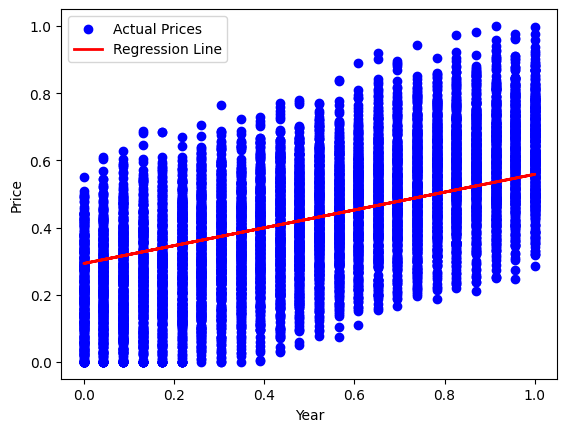

In [ ]:
L=0.01
iterations=300
m=0
c=0
for i in range(iterations):
  if i%10==0:
    print(f"Iteration {i}: m = {m}, c = {c}")
  m,c=gradient_descent(m,c,ds,L)
plt.scatter(ds.Year, ds.Price, color='blue', label="Actual Prices")
plt.plot(ds.Year, m * ds.Year + c, color='red', label="Regression Line", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

PREDICTING THE PRICE (TEST)

In [ ]:
def predict(year):

  norm_year=(year-year_min)/(year_max-year_min)
  price=m*norm_year+c
  denorm_price=price*(price_max-price_min)+price_min
  return denorm_price

price=input("Enter the year of the car")
price=float(price)
price=predict(price)
print(price)

Enter the year of the car2023
11102.26837878964
